## 9.2 Correlation test: Hubble expansion
Hubble's 1929 discovery of the proportionality between the distance and the recession velocity of galaxies marked the beginning of the era of observational cosmology.

##### a: Generate a perfectly correlated dataset $x_i,y_i$ (e.g. using seq()), and a totally uncorrelated dataset (e.g., using rnorm()). Compute the Spearman rank correlation coefficient $r_S$ for both datasets.

##### A: 
A dataset $x_i,y_i$ is correlated, if a functional dependence between the $x_i$ and $y_i$ exists. The simpelest dependence is a proportionality. For the example implemented below, we obtain a $r_S$ of one, meaning the dataset is positively correlated.
The dataset is uncorrelated, if the $x_i$ and $y_i$  are independant of each other. An independance can be achived by choosing random numbers for the parameters. For the example implemented below, we obtain a $r_S$ of approximately zero, meaning the dataset is uncorrelated.

In [1]:
# generate correlated dataset
size_dataset <- 100
x_cor <- seq(0,1,1/(size_dataset-1))
y_cor <- 2*x_cor

# generate uncorrelated dataset
x_uncor <- rnorm(size_dataset)
y_uncor <- rnorm(size_dataset)

In [2]:
# Spearman rank correlation coefficient 

r_S_fun <- function (x,y){
    N <- length(x)
    r <- 1-6*sum((rank(x)-rank(y))**2)/(N**3-N)
    return(r)
}

In [3]:
# test the correlation

cat('\nCorrelation coefficient of correlated dataset\n----------------------------------\n')
r_S_cor <- r_S_fun(x_cor,y_cor)
cat('r_S = ',r_S_cor)

cat('\nCorrelation coefficient of uncorrelated dataset\n----------------------------------\n')
r_S_uncor <- r_S_fun(x_uncor,y_uncor)
cat('r_S = ',r_S_uncor)



Correlation coefficient of correlated dataset
----------------------------------
r_S =  1
Correlation coefficient of uncorrelated dataset
----------------------------------
r_S =  -0.06612661

##### b: Load the Hubble dataset (file Hubble.dat) into R and compute $r_S$.

##### A: 
The Hubble dataset contains distances and velocities. We obtain a $r_S$ of approximately 0.87. Consequently, the dataset is correlated.

In [4]:
# read in data
data <- read.table("Hubble.dat", header=TRUE)

# display the data
data

dist,vel
0.04,111.1
0.03,-83.3
0.19,97.2
0.25,27.8
0.27,-69.4
0.26,-208.3
0.42,819.4
0.50,819.4
0.50,958.3
0.63,666.7


In [5]:
# test the correlation
cat('\nCorrelation coefficient of Hubble dataset\n----------------------------------\n')
r_S_hub <- r_S_fun(data$dist,data$vel)
cat('r_S = ',r_S_hub)


Correlation coefficient of Hubble dataset
----------------------------------
r_S =  0.8717391

##### c: For all three datasets, carry out a test of the null hypthesis that the x and y values are not correlated (use cor.test(x,y,method="spearman")). In the case of the Hubble dataset you get a Warning message - why?

##### A: 
First of all, we observe that the $r_S$ values are similar to the ones that we obtained before. The null hypothesis is thus rejected for datasets one and three, meaning that this datasets are correlated.

The warning message appears to result from some of the distance values appearing multiple times within the data. One possibility is that Hubble was observing galxies of a galaxy cluster. The distances of the cluster are approximately the same, thus the distance appears multiple times.
The problem with this is, that the rank is not unique anymore.

In [6]:
# test the nulhypothesis

cat('\nSpearman test of correlated dataset\n----------------------------------\n')
(test_cor <- cor.test(x_cor,y_cor, method="spearman"))

cat('\nSpearman test of uncorrelated dataset\n----------------------------------\n')
(test_uncor <- cor.test(x_uncor,y_uncor, method="spearman"))

cat('\nSpearman test of Hubble dataset\n----------------------------------\n')
(test_hub <- cor.test(data$dist,data$vel, method="spearman"))



Spearman test of correlated dataset
----------------------------------



	Spearman's rank correlation rho

data:  x_cor and y_cor
S = 0, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
rho 
  1 



Spearman test of uncorrelated dataset
----------------------------------



	Spearman's rank correlation rho

data:  x_uncor and y_uncor
S = 177670, p-value = 0.5127
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.06612661 



Spearman test of Hubble dataset
----------------------------------


Warning message in cor.test.default(data$dist, data$vel, method = "spearman"):
"Cannot compute exact p-value with ties"


	Spearman's rank correlation rho

data:  data$dist and data$vel
S = 295.45, p-value = 2.954e-08
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.8715442 


##### d: Carry out a test of the null hypothesis that the distances of the 24 galaxies in the Hubble dataset are not correlated with the first 24 Fibonacci numbers. What do you find, and where does this result come from? Hint: To calculate the Fibonacci sequence, e.g. start with a vector c(0,1) and use a for-loop to repeatedly append(...) the sum of the last two entries. Alternatively, instead of the Fibonacci sequence you could also use the prime numbers from the first problem sheet.

##### A: 
We obtain a $r_S$ close to one. Thus, the Fibonacci sequence is correlated with the measured distances, and closer correlated than the measured velocities. On the first sight, this result appears to be suprising. But, taking a look on the data shows, that the distance sequence is sorted by increasing value. This can also seen in the plot below. We therefore expect a correlation with the increasing Fibonacci sequence. On the other hand, the velocity data scatters strongly, presumably due to the peculiar motions of galaxies and measurement uncertainties. Hence, a perfect correlation would be the bigger suprise.

In [7]:
# fibonacci sequence

fibo <- function(length){
    f <- 1:length
    for (i in 1:length){
            if (i == 1){
                f[i] <- 0
            } else if (i == 2){
                f[i] <- 1
            } else {
                f[i] <- f[i-1]+f[i-2]
            }
    }
    return(f)
} 

# test
(fibo(10))

[1]  0  1  1  2  3  5  8 13 21 34

In [8]:
# generate fibonacci set
fibo_seq <- fibo(24)

In [9]:
# test the nulhypothesis

cat('\nSpearman test of Hubble distances with Fibonacci sequence\n----------------------------------\n')
(test_hub <- cor.test(data$dist,fibo_seq, method="spearman"))


Spearman test of Hubble distances with Fibonacci sequence
----------------------------------


Warning message in cor.test.default(data$dist, fibo_seq, method = "spearman"):
"Cannot compute exact p-value with ties"


	Spearman's rank correlation rho

data:  data$dist and fibo_seq
S = 18.527, p-value < 2.2e-16
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.9919449 


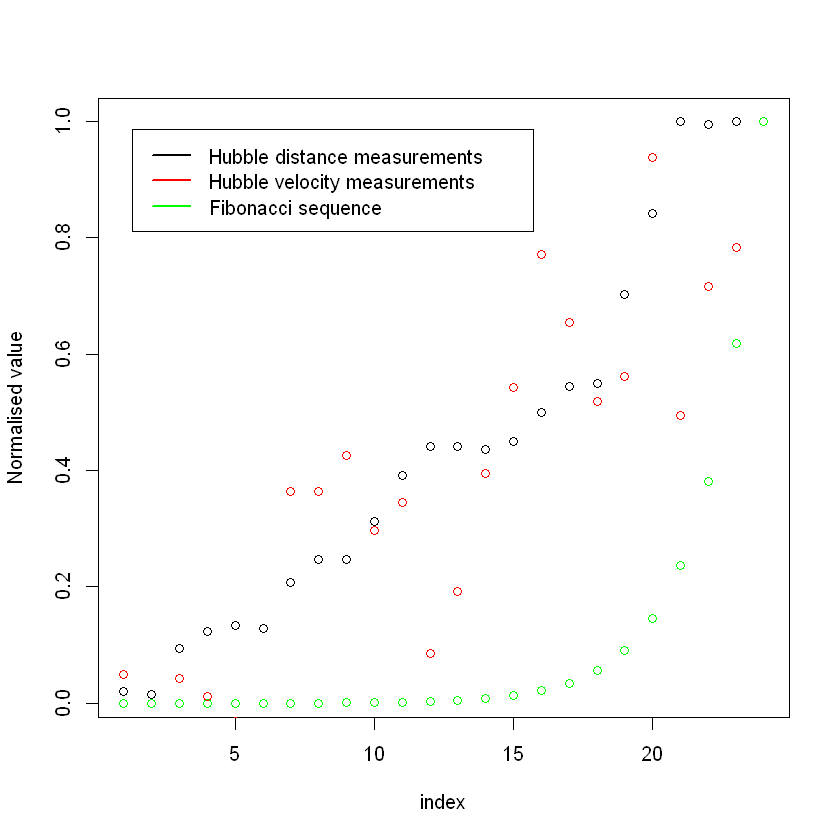

In [10]:
# plot the data against the index
# the sequences are normalised to their maximum values

index <- 1:24
plot(index,data$dist/max(data$dist),ylab='Normalised value')
points(1:24,data$vel/max(data$vel),col='red')
points(1:24,fibo_seq/max(fibo_seq),col='green')

# legend
legend("topleft", legend=c('Hubble distance measurements','Hubble velocity measurements','Fibonacci sequence'), inset=.05, 
       lwd=2, col=c('black','red','green'))

### 9.3 Bayesian model comparison: Is there evidence for a non-zero gradient?

This exercise is a copy of the problem discussed in section 11.3 in the book of Coryn Bailer-Jones (see book chapter on Moodle). Read the section, and re-do the model comparison described there!
Different from the problem in the section, the files gradient10.dat and gradient50.dat (see Moodle) contain new $(x, y)$ data sets for the (in 
total five each) lines to be analyzed. The coefficients of the straight lines have changed a little bit, and are kept secret here. However, the priors that Coryn specifies are still applicable, except for $a_0$ where $P(a_0) \sim N(1, 1)$ should be used. You are expected to provide your own R-implementation of the problem, but - of course - you can study the code given in the book for inspiration. The result should be similar to what is given in the book. Can you confirm this?

We can evaluate the two models (zero gradient or non-zero gradient) using Bayes factor $B_{12}$,

$$
B_{12} = \frac{P(D|M_1)}{P(D|M_2)},
$$

where $D$ denotes the data, and $M_1$ and $M_2$ the two models. 
The marginal likelihoods for the Bayes factor can be computed numerically, wherein

$$
P(D|M)\approx \frac{1}{N_s} \sum_{l=1}^{l=N_s} P(D|\theta_l,M).
$$

Here, $N_s$ number of samples, and $\theta_l$ are drawn from the respective prior. 

Model 1 is that of a straight line with a zero gadient. Thus,
$$
y = b_0.
$$

The model with a non-zero gradient is given by
$$
y = b_0 + (\mathrm{tan}\ \alpha)x.
$$

Herein, we use a guassian prior for $b_0$ with mean zero and standard deviation zero, and uniform priors for $\alpha$ in $[-\pi/2,\pi/2]$ and the logarithm of the standard deviation of the gaussian likelihood function $\log \sigma$. 

In [103]:
## read in data
grad10 <- read.table("gradient10.dat", header=TRUE)
grad50 <- read.table("gradient50.dat", header=TRUE)

# display a few rows of the data
head(grad10)
head(grad50)

x1,y1,x2,y2,x3,y3,x4,y4,x5,y5
0.7370421,0.5076803,2.0680320,1.02741742,8.258134,1.5552934,5.0763902,1.5988832,6.196814,-1.8510273
9.9862200,-1.1229419,0.3674223,0.75132431,4.723582,0.4145978,0.9155857,1.1325733,8.494212,-2.2715941
6.9177968,1.6410877,6.1735632,-0.05634341,2.336220,1.4536253,4.4952805,1.0285311,2.022420,0.7125291
8.2198339,0.2917984,2.8412474,0.05562217,6.185071,-2.0996459,7.5518482,0.1463062,4.414770,-0.4347991
4.1106180,-0.7687210,6.6552361,1.56461068,2.689930,-0.9505907,8.0088304,0.1551587,5.198799,-0.2627402
7.5209267,0.3613838,9.4857645,-1.48101336,1.018042,1.5540351,6.4614092,-0.2657260,2.572161,2.1764997


x1,y1,x2,y2,x3,y3,x4,y4,x5,y5
8.271735,1.844524,7.840315,0.4022219,9.8862714,0.30071211,8.0810545,-1.27192313,5.7021147,-1.0167948
9.386926,-1.664815,5.147171,0.2293083,8.5158300,0.27853899,4.1479026,0.05213472,0.3242692,0.2585535
3.355743,0.445063,6.395592,-0.1041772,5.2614474,-0.77671902,4.7564457,0.25564474,2.3273488,1.8834490
2.177478,1.275993,9.677092,-1.2359304,8.3546809,-0.03818035,6.2674083,0.53572832,8.3147977,-1.4373437
4.876853,-1.343113,1.480085,0.7962320,3.9962003,0.10403493,3.4999357,0.23477069,4.9326902,-0.8034581
2.500323,-0.398679,7.778779,-2.6004515,0.9937834,0.49509469,0.9423114,-0.20594091,7.4143344,-1.6358653


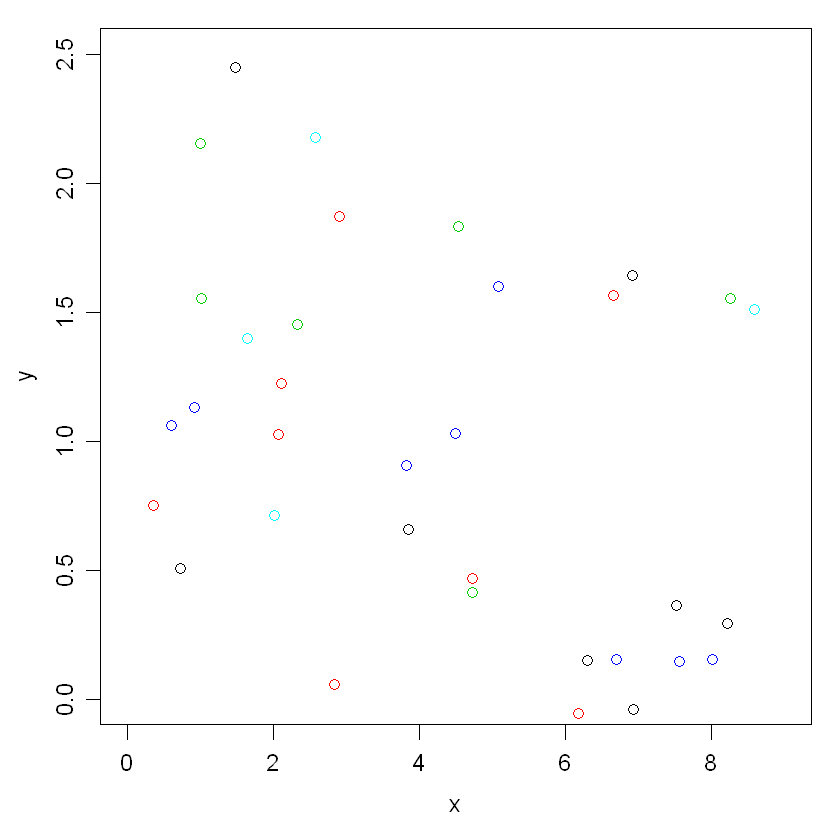

In [124]:
## plot data

# gradient 10 
par(mfrow=c(1,1), mar=c(3.5,3.0,0.5,0.5), oma=0.5*c(1,1,1,1), 
    mgp=c(2.2,0.8,0), cex=1.2)

plot(grad10$x1,grad10$y1,xlim=c(0,9),ylim=c(0,2.5),xlab='x',ylab='y')

for (i in 1:5){
    points(grad10[,2*i-1],grad10[,2*i],col=i)
}

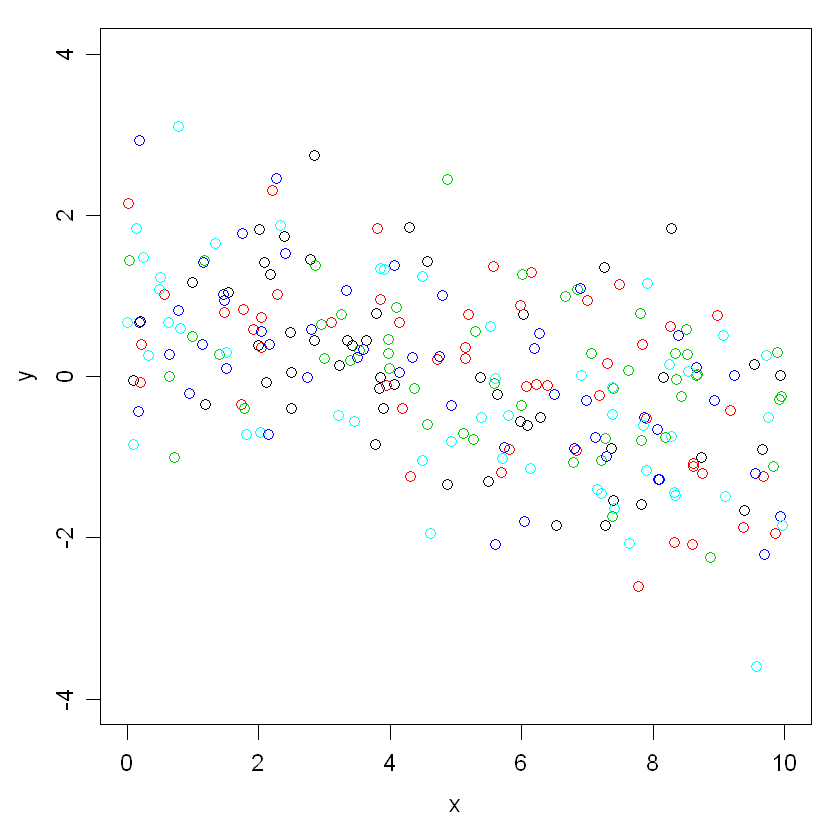

In [125]:
# gradient 50 
par(mfrow=c(1,1), mar=c(3.5,3.0,0.5,0.5), oma=0.5*c(1,1,1,1), 
    mgp=c(2.2,0.8,0), cex=1.2)

plot(grad50$x1,grad50$y1,xlim=c(0,10),ylim=c(-4,4),xlab='x',ylab='y')

for (i in 1:5){
    points(grad50[,2*i-1],grad50[,2*i],col=i)
}

In [200]:
# likelihood function 
marginal_likelihood <- function(sample){
    sum(sample)/length(sample)
}

# Bayes factor
bayes_factor <- function(mlh1,mlh2){
    mlh1/mlh2
}

# straight line
line <- function(b0,a,x){
        b0 + tan(a)*x
}

# likelihood model 1
lh_m1 <- function(x,y,paras){
    b0 <- paras[1]
    s <- 10**paras[3]
    return(prod((s*(2*pi)**0.5)**-1*exp(-(y-b0)**2*0.5*s**-2)))
}

# ikelihood model 2
lh_m2 <- function(x,y,paras){
    b0 <- paras[1]
    a <- paras[2]
    s <- 10**paras[3]
    return(prod((s*(2*pi)**0.5)**-1*exp(-(y-line(b0,a,x))**2*0.5*s**-2)))
}

In [176]:
# generate random samples drawn from the prior
# samples for b_0, alpha, log10(sigma)

set.seed(100)
Nsamp <- 1e5 # number of samples
priorSamp <- cbind(rnorm(n=Nsamp, mean=1, sd=1), 
                   runif(n=Nsamp, min=-pi/2, max=pi/2),
                   runif(n=Nsamp, min=log10(0.5), max=log10(2)))

In [220]:
#### compute marginal likelihoods for gradient 10 set

# model 1
mlhs10_m1 <- 1:5

# model 2
mlhs10_m2 <- 1:5

for (i in 1:5){
    mlhs10_m1[i] <- marginal_likelihood(apply(priorSamp,1,lh_m1,x=grad10[,2*i-1],y=grad10[,2*i]))
    mlhs10_m2[i] <- marginal_likelihood(apply(priorSamp,1,lh_m2,x=grad10[,2*i-1],y=grad10[,2*i]))
}

#### bayes factor for gradient 10 set
bf10 <- bayes_factor(mlhs10_m1,mlhs10_m2)

#### compute marginal likelihoods for gradient 50 set

# model 1
mlhs50_m1 <- 1:5

# model 2
mlhs50_m2 <- 1:5

for (i in 1:5){
    mlhs50_m1[i] <- marginal_likelihood(apply(priorSamp,1,lh_m1,x=grad50[,2*i-1],y=grad50[,2*i]))
    mlhs50_m2[i] <- marginal_likelihood(apply(priorSamp,1,lh_m2,x=grad50[,2*i-1],y=grad50[,2*i]))
}

#### bayes factor for gradient 50 set
bf50 <- bayes_factor(mlhs50_m1,mlhs50_m2)

In [221]:
# print results
cat("BF_12           | ", "1     2     3     4     5", "\n")
cat("-------------------------------------------------", "\n")
cat("gradient10 set  | ", round(bf10,3), "\n")
cat("gradient50 set  | ", round(bf50,3), "\n")


BF_12           |  1     2     3     4     5 
------------------------------------------------- 
gradient10 set  |  6.582 4.099 6.517 2.034 2.352 
gradient50 set  |  0.118 0.003 1.698 0.001 0.002 
